In [ ]:
import numpy as np
import prettytable as pt

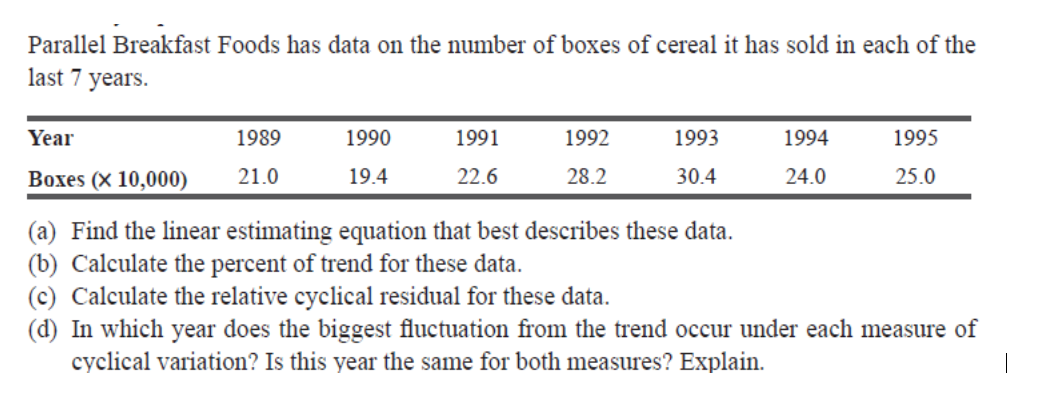

In [ ]:
#1.-----------------------------------------------------------------------

year=np.array(list(range(1989,1996)))
boxes=np.dot([21.0, 19.4, 22.6, 28.2, 30.4, 24.0, 25.0],10000.0)

In [ ]:
mean_year = np.mean(year)
mean_boxes = np.mean(boxes)

numerator = np.sum((year - mean_year) * (boxes - mean_boxes))
denominator = np.sum((year - mean_year)**2)

slope = numerator / denominator
intercept = mean_boxes - slope * mean_year

print(f"The linear estimating equation (manual calculation) is: y = {slope:.2f}x + {intercept:.2f}")

The linear estimating equation (manual calculation) is: y = 10357.14x + -20387714.29


In [ ]:
import prettytable as pt

trend_values = slope * np.array(year) + intercept

percent_of_trend = (boxes / trend_values) * 100

relative_cyclical_residual = ((boxes - trend_values) / trend_values)*100

table = pt.PrettyTable()
table.field_names = ["Year", "Actual Boxes", "Trend Value", "Percent of Trend", "Relative Cyclical Residual"]

for i in range(len(year)):
    table.add_row([year[i], f"{boxes[i]:.2f}", f"{trend_values[i]:.2f}", f"{percent_of_trend[i]:.2f}%", f"{relative_cyclical_residual[i]:.2f}%"])

print(table)

+------+--------------+-------------+------------------+----------------------------+
| Year | Actual Boxes | Trend Value | Percent of Trend | Relative Cyclical Residual |
+------+--------------+-------------+------------------+----------------------------+
| 1989 |  210000.00   |  212642.86  |      98.76%      |           -1.24%           |
| 1990 |  194000.00   |  223000.00  |      87.00%      |          -13.00%           |
| 1991 |  226000.00   |  233357.14  |      96.85%      |           -3.15%           |
| 1992 |  282000.00   |  243714.29  |     115.71%      |           15.71%           |
| 1993 |  304000.00   |  254071.43  |     119.65%      |           19.65%           |
| 1994 |  240000.00   |  264428.57  |      90.76%      |           -9.24%           |
| 1995 |  250000.00   |  274785.71  |      90.98%      |           -9.02%           |
+------+--------------+-------------+------------------+----------------------------+


In [ ]:
# year with the largest absolute "Percent of Trend"
year_max_percent_trend = year[np.argmax(np.abs(percent_of_trend))]
year_max_trend_val=max(100-np.abs(percent_of_trend))
print(f"The year with the biggest fluctuation under 'Percent of Trend' is: {year_max_percent_trend}")
print(f"The biggest fluctuation under 'Percent of Trend' is: {year_max_trend_val}%")

# year with the largest absolute "Relative Cyclic Residuals"
year_max_relative_residual = year[np.argmax(np.abs(relative_cyclical_residual))]
year_max_relative_residual_val=max(np.abs(relative_cyclical_residual))
print(f"The year with the biggest fluctuation under 'Relative Cyclic Residuals' is: {year_max_relative_residual}")
print(f"The biggest fluctuation under 'Relative Cyclic Residuals' is: {year_max_relative_residual_val}%")

if year_max_percent_trend == year_max_relative_residual:
    print("Yes, the year with the biggest fluctuation is the same for both measures.")
else:
    print("No, the year with the biggest fluctuation is different for both measures.")

The year with the biggest fluctuation under 'Percent of Trend' is: 1993
The biggest fluctuation under 'Percent of Trend' is: 13.004484304932745%
The year with the biggest fluctuation under 'Relative Cyclic Residuals' is: 1993
The biggest fluctuation under 'Relative Cyclic Residuals' is: 19.65139162215325%
Yes, the year with the biggest fluctuation is the same for both measures.


In [ ]:
'''
    -"Percent of Trend" is (Actual / Trend) * 100 - shows the actual value relative to the trend.

    -"Relative Cyclical Residuals" is ((Actual - Trend) / Trend) * 100, showing the difference from the trend relative to the trend.

    -"Percent of Trend" uses 100% as its baseline (representing the trend), while "Relative Cyclical Residuals" uses 0% as its baseline (representing no deviation from the trend).

    -"Eventhough they are the same in most cases, the year with the largest fluctuation could differ when the percent trend has a value 100%(indicating exact match with actual) and 0%(indiacting no deviation from trend).
'''

'\n    -"Percent of Trend" is (Actual / Trend) * 100 - shows the actual value relative to the trend.\n\n    -"Relative Cyclical Residuals" is ((Actual - Trend) / Trend) * 100, showing the difference from the trend relative to the trend.\n\n    -"Percent of Trend" uses 100% as its baseline (representing the trend), while "Relative Cyclical Residuals" uses 0% as its baseline (representing no deviation from the trend).\n\n    -"Eventhough they are the same in most cases, the year with the largest fluctuation could differ when the percent trend has a value 100%(indicating exact match with actual) and 0%(indiacting no deviation from trend).\n'

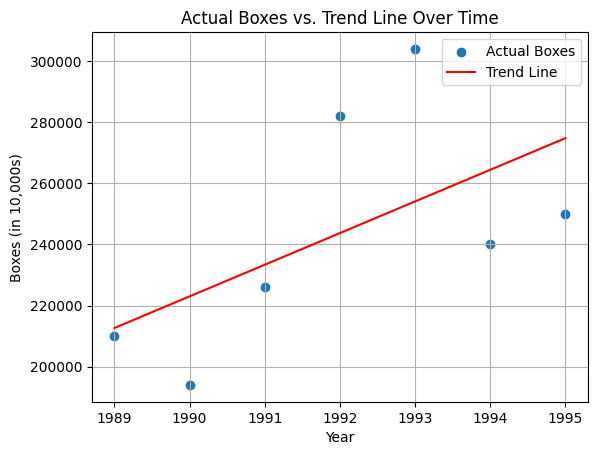

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(year, boxes, label='Actual Boxes')
plt.plot(year, trend_values, color='red', label='Trend Line')
plt.xlabel("Year")
plt.ylabel("Boxes (in 10,000s)")
plt.title("Actual Boxes vs. Trend Line Over Time")
plt.legend()
plt.grid(True)
plt.show()

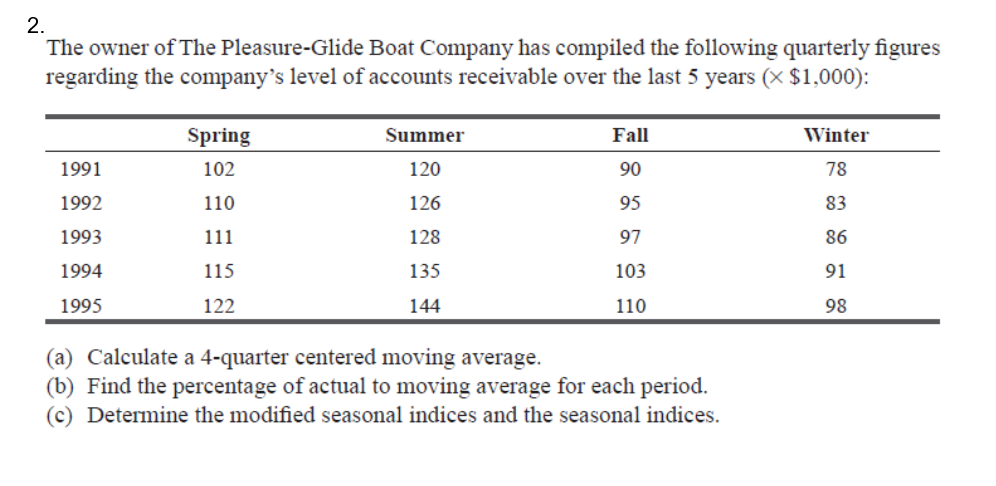

In [ ]:
#2.------------------------------------------------------------------------------

years = [1991, 1992, 1993, 1994, 1995]
quarters = ['Spring', 'Summer', 'Fall', 'Winter']
data = [
    [102, 120, 90, 78],
    [110, 126, 95, 83],
    [111, 128, 97, 86],
    [115, 135, 103, 91],
    [122, 144, 110, 98]
]


In [ ]:
import pandas as pd

flat_data = []
for i in range(len(years)):
    for j in range(len(quarters)):
        flat_data.append({'Year': years[i], 'Quarter': quarters[j], 'Sales (Units)': data[i][j]})

df = pd.DataFrame(flat_data)
print(df)

# 4-Quarter Moving Total
df['4-Quarter Moving Total'] = df['Sales (Units)'].rolling(window=4,center=True).sum()

# 4-Quarter Moving Average
df['4-Quarter Moving Avg'] = df['4-Quarter Moving Total'] / 4

# 4-Quarter Centered Moving Average
df['4-Quarter Centered Moving Avg'] = df['4-Quarter Moving Avg'].rolling(window=2).mean().shift(-1)

# % of actual to Moving Average Value
df['% of actual to MAV'] = df['Sales (Units)'] / df['4-Quarter Centered Moving Avg']*100

df = df[['Year', 'Quarter', 'Sales (Units)', '4-Quarter Moving Total', '4-Quarter Moving Avg', '4-Quarter Centered Moving Avg', '% of actual to MAV']]

print("\nResults Table:")
display(df)

    Year Quarter  Sales (Units)
0   1991  Spring            102
1   1991  Summer            120
2   1991    Fall             90
3   1991  Winter             78
4   1992  Spring            110
5   1992  Summer            126
6   1992    Fall             95
7   1992  Winter             83
8   1993  Spring            111
9   1993  Summer            128
10  1993    Fall             97
11  1993  Winter             86
12  1994  Spring            115
13  1994  Summer            135
14  1994    Fall            103
15  1994  Winter             91
16  1995  Spring            122
17  1995  Summer            144
18  1995    Fall            110
19  1995  Winter             98

Results Table:


,Year,Quarter,Sales (Units),4-Quarter Moving Total,4-Quarter Moving Avg,4-Quarter Centered Moving Avg,% of actual to MAV
0,1991,Spring,102,NaN,NaN,NaN,NaN
1,1991,Summer,120,NaN,NaN,NaN,NaN
2,1991,Fall,90,390.0,97.50,98.500,91.370558
3,1991,Winter,78,398.0,99.50,100.250,77.805486
4,1992,Spring,110,404.0,101.00,101.625,108.241082
5,1992,Summer,126,409.0,102.25,102.875,122.478736
6,1992,Fall,95,414.0,103.50,103.625,91.676719
7,1992,Winter,83,415.0,103.75,104.000,79.807692
8,1993,Spring,111,417.0,104.25,104.500,106.220096
9,1993,Summer,128,419.0,104.75,105.125,121.759810


In [ ]:
df1 = df.pivot_table(index='Year', columns='Quarter', values='% of actual to MAV')

quarter_order = ['Spring', 'Summer', 'Fall', 'Winter']
df1 = df1.reindex(columns=quarter_order)
display(df1)

Quarter,Spring,Summer,Fall,Winter
Year,,,,
1991,NaN,NaN,91.370558,77.805486
1992,108.241082,122.478736,91.676719,79.807692
1993,106.220096,121.759810,91.509434,80.093132
1994,105.504587,122.310306,92.067039,79.912184
1995,105.285868,122.422954,NaN,NaN


In [ ]:
import numpy as np

for col in df1.columns:
    values = df1[col].dropna()

    if len(values) >= 3:
        min_val = np.min(values)
        max_val = np.max(values)

        remaining_values = values[(values != min_val) & (values != max_val)]
        mean_of_remaining = np.mean(remaining_values)

        print(f"Quarter: {col}")
        print(f"Min (excluding NaN): {min_val:.2f}")
        print(f"Max (excluding NaN): {max_val:.2f}")
        print(f"Mean of remaining values (excluding min, max, and NaN): {mean_of_remaining:.2f}\n")
    elif len(values) > 0:
        print(f"Quarter: {col}")
        print(f"Not enough non-NaN values (less than 3) to exclude min and max. Values: {values.tolist()}\n")
    else:
        print(f"Quarter: {col}")
        print("No non-NaN values in this quarter.\n")

Quarter: Spring
Min (excluding NaN): 105.29
Max (excluding NaN): 108.24
Mean of remaining values (excluding min, max, and NaN): 105.86

Quarter: Summer
Min (excluding NaN): 121.76
Max (excluding NaN): 122.48
Mean of remaining values (excluding min, max, and NaN): 122.37

Quarter: Fall
Min (excluding NaN): 91.37
Max (excluding NaN): 92.07
Mean of remaining values (excluding min, max, and NaN): 91.59

Quarter: Winter
Min (excluding NaN): 77.81
Max (excluding NaN): 80.09
Mean of remaining values (excluding min, max, and NaN): 79.86



In [ ]:
import numpy as np
import pandas as pd

df1 = df.pivot_table(index='Year', columns='Quarter', values='% of actual to MAV')

quarter_order = ['Spring', 'Summer', 'Fall', 'Winter']
df1 = df1.reindex(columns=quarter_order)

mean_values = {}

for col in df1.columns:
    values = df1[col].dropna()

    if len(values) >= 3:
        min_val = np.min(values)
        max_val = np.max(values)

        remaining_values = values[(values != min_val) & (values != max_val)]
        mean_of_remaining = np.mean(remaining_values)

        mean_values[col] = mean_of_remaining

    elif len(values) > 0:
        print(f"Quarter: {col}")
        print(f"Not enough non-NaN values (less than 3) to exclude min and max. Values: {values.tolist()}\n")
    else:
        print(f"Quarter: {col}")
        print("No non-NaN values in this quarter.\n")

print("Mean values (excluding min, max, and NaN) for each quarter:")
for quarter, mean_val in mean_values.items():
    print(f"{quarter}: {mean_val:.2f}")

sum_of_indices=sum(mean_values.values())
print("\nSum of Indices:")
print(sum_of_indices)

adjusting_const=400/sum_of_indices
print("\nAdjusting Constant:")
print(adjusting_const)

Mean values (excluding min, max, and NaN) for each quarter:
Spring: 105.86
Summer: 122.37
Fall: 91.59
Winter: 79.86

Sum of Indices:
399.6819862753047

Adjusting Constant:
1.0007956668942197


In [ ]:
seasonal_indices = mean_values.copy()

for quarter in seasonal_indices:
    seasonal_indices[quarter] *= adjusting_const

print("Adjusted seasonal indices:")
for quarter, seasonal_index in seasonal_indices.items():
    print(f"{quarter}: {seasonal_index:.2f}")


sum_seasonal_index=sum(seasonal_indices.values())
print("\nSum of Seasonal Indices:")
print(sum_seasonal_index)

mean_seasonal_index=sum_seasonal_index/4
print("\nMean Seasonal Index:")
print(mean_seasonal_index)

Adjusted seasonal indices:
Spring: 105.95
Summer: 122.46
Fall: 91.67
Winter: 79.92

Sum of Seasonal Indices:
399.99999999999994

Mean Seasonal Index:
99.99999999999999


In [ ]:
#3.------------------------------------------------------------------------------

years = [1992, 1993, 1994, 1995]
quarters = ['Spring', 'Summer', 'Fall', 'Winter']
data = [
    [5.6, 6.8, 6.3, 5.2],
    [5.7, 6.7, 6.4, 5.4],
    [5.3, 6.6, 6.1, 5.1],
    [5.4, 6.9, 6.2, 5.3],
]


In [ ]:
import pandas as pd

flat_data = []
for i in range(len(years)):
    for j in range(len(quarters)):
        flat_data.append({'Year': years[i], 'Quarter': quarters[j], 'Sales (Units)': data[i][j]})

df = pd.DataFrame(flat_data)

# 4-Quarter Moving Total
df['4-Quarter Moving Total'] = df['Sales (Units)'].rolling(window=4,center=True).sum()

# 4-Quarter Moving Average
df['4-Quarter Moving Avg'] = df['4-Quarter Moving Total'] / 4

# 4-Quarter Centered Moving Average
df['4-Quarter Centered Moving Avg'] = df['4-Quarter Moving Avg'].rolling(window=2).mean().shift(-1)

# % of actual to Moving Average Value
df['% of actual to MAV'] = df['Sales (Units)'] / df['4-Quarter Centered Moving Avg']*100

df = df[['Year', 'Quarter', 'Sales (Units)', '4-Quarter Moving Total', '4-Quarter Moving Avg', '4-Quarter Centered Moving Avg', '% of actual to MAV']]

print("\nResults Table:")
display(df)


Results Table:


,Year,Quarter,Sales (Units),4-Quarter Moving Total,4-Quarter Moving Avg,4-Quarter Centered Moving Avg,% of actual to MAV
0,1992,Spring,5.6,NaN,NaN,NaN,NaN
1,1992,Summer,6.8,NaN,NaN,NaN,NaN
2,1992,Fall,6.3,23.9,5.975,5.9875,105.219207
3,1992,Winter,5.2,24.0,6.000,5.9875,86.847599
4,1993,Spring,5.7,23.9,5.975,5.9875,95.198330
5,1993,Summer,6.7,24.0,6.000,6.0250,111.203320
6,1993,Fall,6.4,24.2,6.050,6.0000,106.666667
7,1993,Winter,5.4,23.8,5.950,5.9375,90.947368
8,1994,Spring,5.3,23.7,5.925,5.8875,90.021231
9,1994,Summer,6.6,23.4,5.850,5.8125,113.548387


In [ ]:
#4.------------------------------------------------------------------------------

years = [1992, 1993, 1994, 1995]
quarters = ['Winter', 'Spring', 'Summer', 'Fall']
data = [
    [293, 246, 231, 282],
    [301, 252, 227, 291],
    [304, 259, 239, 296],
    [306, 265, 240, 300],
]


In [ ]:
import pandas as pd

flat_data = []
for i in range(len(years)):
    for j in range(len(quarters)):
        flat_data.append({'Year': years[i], 'Quarter': quarters[j], 'Sales (Units)': data[i][j]})

df = pd.DataFrame(flat_data)

# 4-Quarter Moving Total
df['4-Quarter Moving Total'] = df['Sales (Units)'].rolling(window=4,center=True).sum()

# 4-Quarter Moving Average
df['4-Quarter Moving Avg'] = df['4-Quarter Moving Total'] / 4

# 4-Quarter Centered Moving Average
df['4-Quarter Centered Moving Avg'] = df['4-Quarter Moving Avg'].rolling(window=2).mean().shift(-1)

# % of actual to Moving Average Value
df['% of actual to MAV'] = df['Sales (Units)'] / df['4-Quarter Centered Moving Avg']*100

df = df[['Year', 'Quarter', 'Sales (Units)', '4-Quarter Moving Total', '4-Quarter Moving Avg', '4-Quarter Centered Moving Avg', '% of actual to MAV']]

print("\nResults Table:")
display(df)


Results Table:


,Year,Quarter,Sales (Units),4-Quarter Moving Total,4-Quarter Moving Avg,4-Quarter Centered Moving Avg,% of actual to MAV
0,1992,Winter,293,NaN,NaN,NaN,NaN
1,1992,Spring,246,NaN,NaN,NaN,NaN
2,1992,Summer,231,1052.0,263.00,264.000,87.500000
3,1992,Fall,282,1060.0,265.00,265.750,106.114770
4,1993,Winter,301,1066.0,266.50,266.000,113.157895
5,1993,Spring,252,1062.0,265.50,266.625,94.514768
6,1993,Summer,227,1071.0,267.75,268.125,84.662005
7,1993,Fall,291,1074.0,268.50,269.375,108.027842
8,1994,Winter,304,1081.0,270.25,271.750,111.867525
9,1994,Spring,259,1093.0,273.25,273.875,94.568690


In [ ]:
df1 = df.pivot_table(index='Year', columns='Quarter', values='% of actual to MAV')
display(df1)
quarter_order = ['Winter', 'Spring', 'Summer', 'Fall']
df1 = df1.reindex(columns=quarter_order)
display(df1)

Quarter,Fall,Spring,Summer,Winter
Year,,,,
1992,106.114770,NaN,87.500000,NaN
1993,108.027842,94.514768,84.662005,113.157895
1994,107.343608,94.568690,86.988171,111.867525
1995,NaN,95.581605,NaN,110.619069


Quarter,Winter,Spring,Summer,Fall
Year,,,,
1992,NaN,NaN,87.500000,106.114770
1993,113.157895,94.514768,84.662005,108.027842
1994,111.867525,94.568690,86.988171,107.343608
1995,110.619069,95.581605,NaN,NaN


In [ ]:
import numpy as np
import pandas as pd

mean_values = {}

for col in df1.columns:
    values = df1[col].dropna()

    if len(values) >= 3:
        min_val = np.min(values)
        max_val = np.max(values)

        remaining_values = values[(values != min_val) & (values != max_val)]
        mean_of_remaining = np.mean(remaining_values)

        mean_values[col] = mean_of_remaining

    elif len(values) > 0:
        print(f"Quarter: {col}")
        print(f"Not enough non-NaN values (less than 3) to exclude min and max. Values: {values.tolist()}\n")
    else:
        print(f"Quarter: {col}")
        print("No non-NaN values in this quarter.\n")

print("Mean values (excluding min, max, and NaN) for each quarter:")
for quarter, mean_val in mean_values.items():
    print(f"{quarter}: {mean_val:.2f}")

sum_of_indices=sum(mean_values.values())
print("\nSum of Indices:")
print(sum_of_indices)

adjusting_const=400/sum_of_indices
print("\nAdjusting Constant:")
print(adjusting_const)

Mean values (excluding min, max, and NaN) for each quarter:
Winter: 111.87
Spring: 94.57
Summer: 86.99
Fall: 107.34

Sum of Indices:
400.7679948003273

Adjusting Constant:
0.998083692285084


In [ ]:
seasonal_indices = mean_values.copy()

for quarter in seasonal_indices:
    seasonal_indices[quarter] *= adjusting_const

print("Adjusted seasonal indices:")
for quarter, seasonal_index in seasonal_indices.items():
    print(f"{quarter}: {seasonal_index:.2f}")


sum_seasonal_index=sum(seasonal_indices.values())
print("\nSum of Seasonal Indices:")
print(sum_seasonal_index)

mean_seasonal_index=sum_seasonal_index/4
print("\nMean Seasonal Index:")
print(mean_seasonal_index)

Adjusted seasonal indices:
Winter: 111.65
Spring: 94.39
Summer: 86.82
Fall: 107.14

Sum of Seasonal Indices:
400.00000000000006

Mean Seasonal Index:
100.00000000000001


In [ ]:
seasonal_index=[]
for i in range(4):
    seasonal_index.append(seasonal_indices[quarter_order[i]]/100)
print(seasonal_index)

data_d = [[0 for _ in range(len(data[0]))] for _ in range(len(data))]

for i in range(len(data)):
  for j in range(len(data[i])):
    data_d[i][j]=data[i][j]/seasonal_index[j]

print("\nDeseasonalized data")
print(data_d)

[np.float64(1.1165315269720901), np.float64(0.9438746738542647), np.float64(0.8682147496128664), np.float64(1.0713790495607793)]

Deseasonalized data
[[np.float64(262.41981791108356), np.float64(260.6278214834088), np.float64(266.0632062551368), np.float64(263.2121657742031)], [np.float64(269.5848641339118), np.float64(266.9845976171505), np.float64(261.45605116846775), np.float64(271.6125540435925)], [np.float64(272.2717564674724), np.float64(274.4008364398491), np.float64(275.2775164284748), np.float64(276.2794364154756)], [np.float64(274.06301802317944), np.float64(280.7576125735908), np.float64(276.4293052001421), np.float64(280.01294231298203)]]


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


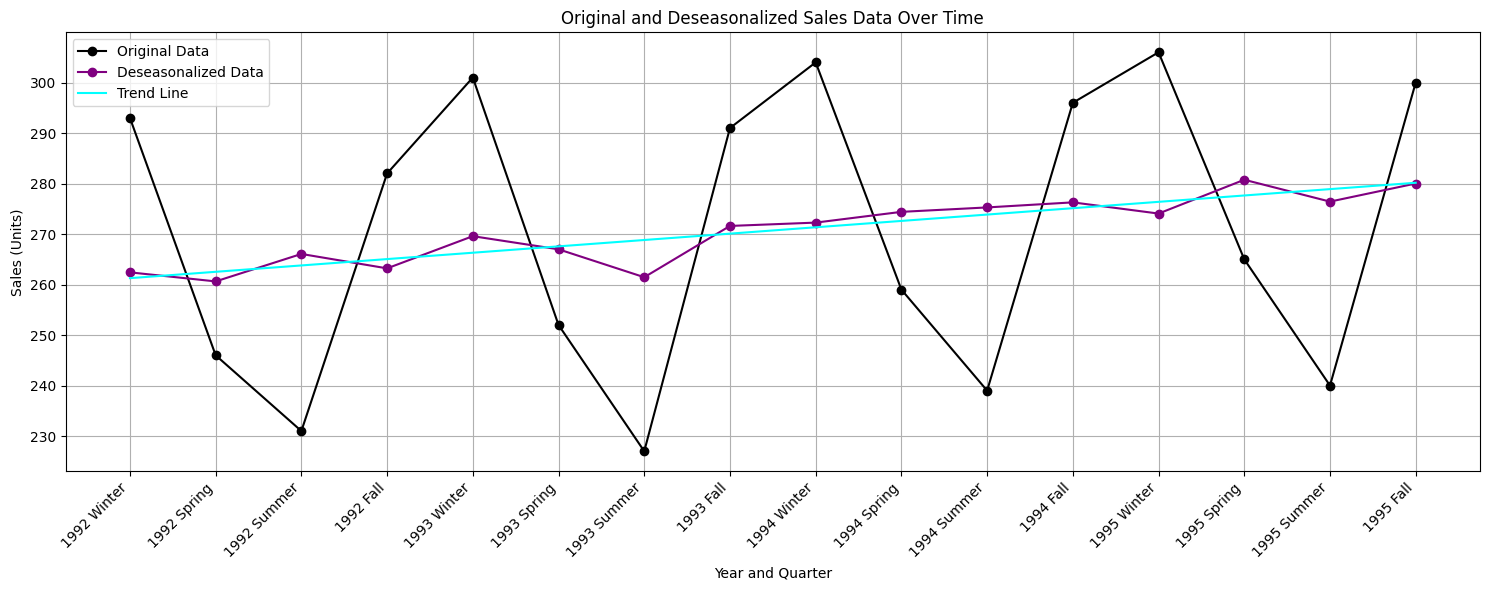

In [ ]:
original_data_flat = [item for sublist in data for item in sublist] # flattening to a single list

deseasonalized_data_flat = [item for sublist in data_d for item in sublist]

years_flat = [y for y in years for q in quarters]
quarters_flat = quarters * len(years)

quarter_map = {'Winter': 0, 'Spring': 1, 'Summer': 2, 'Fall': 3}
quarter_numeric = [quarter_map[q] for q in quarters_flat] # mapping each quarter to a numeric value in(0,1,2,3)

# Combining year and quarter for x-axis
x_values = [y + (q_num / 4) for y, q_num in zip(years_flat, quarter_numeric)]
x_labels = [f'{y} {q}' for y, q in zip(years_flat, quarters_flat)]

time_points = np.arange(len(deseasonalized_data_flat))
print(time_points)
slope_deseasonalized, intercept_deseasonalized = np.polyfit(time_points, deseasonalized_data_flat, 1)
trend_deseasonalized = slope_deseasonalized * time_points + intercept_deseasonalized

plt.figure(figsize=(15, 6))

#original data
plt.plot(x_values, original_data_flat, marker='o',color='black', linestyle='-', label='Original Data')

#deseasonalized data
plt.plot(x_values, deseasonalized_data_flat, color='Purple', marker='o', linestyle='-', label='Deseasonalized Data')

#trend line
plt.plot(x_values, trend_deseasonalized, color='cyan', label='Trend Line')
plt.xlabel("Year and Quarter")
plt.ylabel("Sales (Units)")
plt.title("Original and Deseasonalized Sales Data Over Time")
plt.xticks(x_values, x_labels, rotation=45, ha='right')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#5.------------------------------------------------------------------------------

import pandas as pd
import numpy as np

df = pd.read_csv('500040.csv') # Aditya_birla Real Estate Industries

dates = np.random.randint(1, len(df), 150)

selected_df = df.iloc[dates].copy()

selected_df.loc[:, 'Rate of Return'] = ((selected_df['Close Price'] - selected_df['Open Price']) / selected_df['Open Price']) * 100

f_df = selected_df[['Open Price', 'Close Price', 'Rate of Return']].copy()
display(f_df.head())

,Open Price,Close Price,Rate of Return
32,2700.0,2712.60,0.466667
98,2198.0,2170.25,-1.262511
170,1880.0,1924.65,2.375000
66,2840.0,2775.30,-2.278169
248,1226.2,1280.00,4.387539


Linear Regression Equation: y = -0.0062x + 0.5462


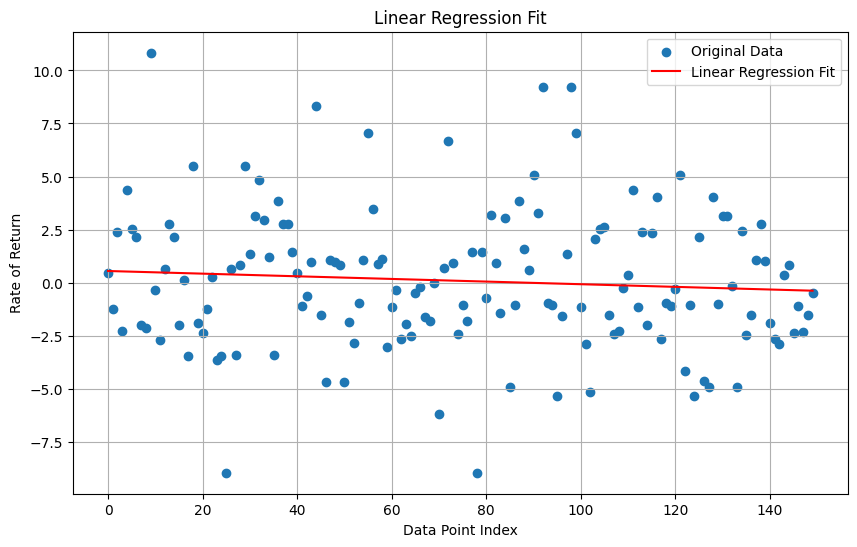

In [ ]:
# linear regression

y = f_df['Rate of Return'].values

x = np.arange(len(f_df))

mean_x = np.mean(x)
mean_y = np.mean(y)

numerator_linear = np.sum((x - mean_x) * (y - mean_y))
denominator_linear = np.sum((x - mean_x)**2)
slope_linear = numerator_linear / denominator_linear
intercept_linear = mean_y - slope_linear * mean_x

print(f"Linear Regression Equation: y = {slope_linear:.4f}x + {intercept_linear:.4f}")

y_pred_linear = slope_linear * x + intercept_linear

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Original Data')
plt.plot(x, y_pred_linear, color='red', label='Linear Regression Fit')
plt.xlabel("Data Point Index")
plt.ylabel("Rate of Return")
plt.title("Linear Regression Fit")
plt.legend()
plt.grid(True)
plt.show()


Quadratic Regression Equation: y = -0.0001x^2 + 0.0036x + 0.3031


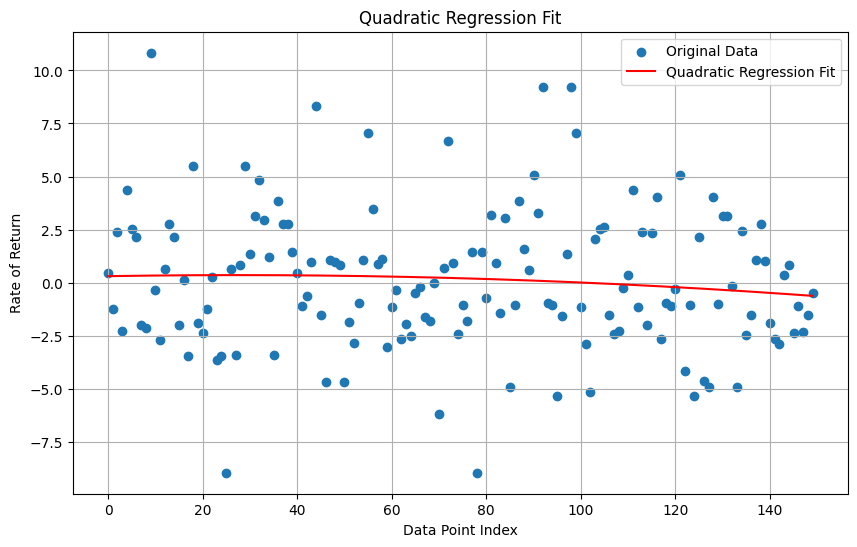

In [ ]:
# Quadractic Regression

x_quadratic = np.column_stack((np.ones(len(x)), x, x**2))

# (X^T * X)^-1 * X^T * y
X_transpose_X = np.dot(x_quadratic.T, x_quadratic)
X_transpose_y = np.dot(x_quadratic.T, y)

X_transpose_X_inv = np.linalg.inv(X_transpose_X)

coefficients_quadratic = np.dot(X_transpose_X_inv, X_transpose_y)

intercept_quadratic = coefficients_quadratic[0]
slope_quadratic_x = coefficients_quadratic[1]
slope_quadratic_x2 = coefficients_quadratic[2]

print(f"Quadratic Regression Equation: y = {slope_quadratic_x2:.4f}x^2 + {slope_quadratic_x:.4f}x + {intercept_quadratic:.4f}")

y_pred_quadratic = intercept_quadratic + slope_quadratic_x * x + slope_quadratic_x2 * (x**2)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Original Data')
plt.plot(x, y_pred_quadratic, color='red', label='Quadratic Regression Fit')
plt.xlabel("Data Point Index")
plt.ylabel("Rate of Return")
plt.title("Quadratic Regression Fit")
plt.legend()
plt.grid(True)
plt.show()


Cubic Regression Equation: y = -0.0000x^3 + 0.0010x^2 + -0.0595x + 1.0737


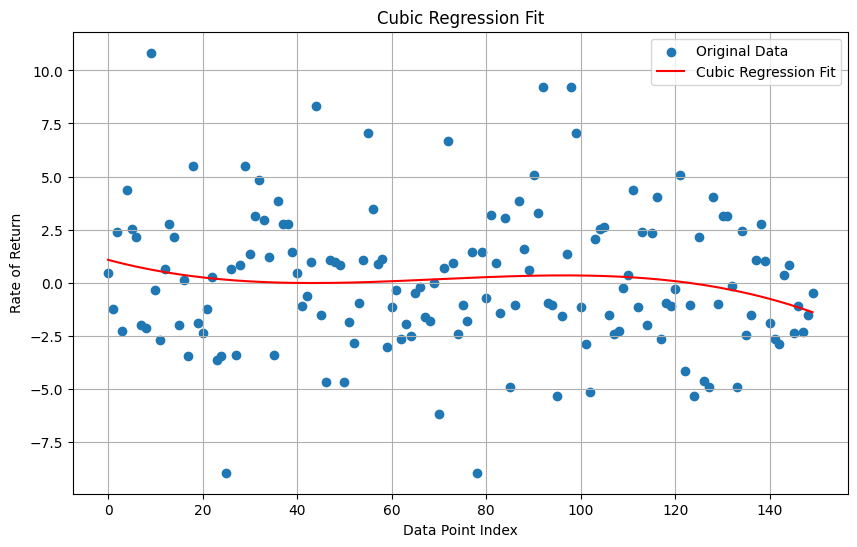

In [ ]:
# cubic regression

x_cubic = np.column_stack((np.ones(len(x)), x, x**2, x**3))

# (X^T * X)^-1 * X^T * y
X_transpose_X = np.dot(x_cubic.T, x_cubic)
X_transpose_y = np.dot(x_cubic.T, y)

X_transpose_X_inv = np.linalg.inv(X_transpose_X)

coefficients_cubic = np.dot(X_transpose_X_inv, X_transpose_y)

intercept_cubic = coefficients_cubic[0]
slope_cubic_x = coefficients_cubic[1]
slope_cubic_x2 = coefficients_cubic[2]
slope_cubic_x3 = coefficients_cubic[3]

print(f"Cubic Regression Equation: y = {slope_cubic_x3:.4f}x^3 + {slope_cubic_x2:.4f}x^2 + {slope_cubic_x:.4f}x + {intercept_cubic:.4f}")

y_pred_cubic = intercept_cubic + slope_cubic_x * x + slope_cubic_x2 * (x**2) + slope_cubic_x3 * (x**3)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Original Data')
plt.plot(x, y_pred_cubic, color='red', label='Cubic Regression Fit')
plt.xlabel("Data Point Index")
plt.ylabel("Rate of Return")
plt.title("Cubic Regression Fit")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Validation n Coefficient of Determination

mse_linear = np.mean((y - y_pred_linear)**2)
# R-squared
ssr_linear = np.sum((y_pred_linear - mean_y)**2)
sst_linear = np.sum((y - mean_y)**2)
r2_linear = ssr_linear / sst_linear

print(f"--- Linear Regression Evaluation ---")
print(f"Mean Squared Error (MSE): {mse_linear:.4f}")
print(f"R-squared (R2): {r2_linear:.4f}")
print("-" * 30)

# evaluation metrics for Quadratic Regression
mse_quadratic = np.mean((y - y_pred_quadratic)**2)
# R-squared
ssr_quadratic = np.sum((y_pred_quadratic - mean_y)**2)
sst_quadratic = np.sum((y - mean_y)**2)
r2_quadratic = ssr_quadratic / sst_quadratic

print(f"--- Quadratic Regression Evaluation ---")
print(f"Mean Squared Error (MSE): {mse_quadratic:.4f}")
print(f"R-squared (R2): {r2_quadratic:.4f}")
print("-" * 30)


# evaluation metrics for Cubic Regression
mse_cubic = np.mean((y - y_pred_cubic)**2)
# R-squared
ssr_cubic = np.sum((y_pred_cubic - mean_y)**2)
sst_cubic = np.sum((y - mean_y)**2)
r2_cubic = ssr_cubic / sst_cubic

print(f"--- Cubic Regression Evaluation ---")
print(f"Mean Squared Error (MSE): {mse_cubic:.4f}")
print(f"R-squared (R2): {r2_cubic:.4f}")
print("-" * 30)

#lower MSE[0,inf) and higher R-squared[0,1] generally indicates a better fit.

--- Linear Regression Evaluation ---
Mean Squared Error (MSE): 10.7423
R-squared (R2): 0.0067
------------------------------
--- Quadratic Regression Evaluation ---
Mean Squared Error (MSE): 10.7300
R-squared (R2): 0.0079
------------------------------
--- Cubic Regression Evaluation ---
Mean Squared Error (MSE): 10.6381
R-squared (R2): 0.0164
------------------------------


In [ ]:
from scipy import stats

residuals_linear = y - y_pred_linear
print("Linear Regression Residuals (first 10):")
print(residuals_linear[:10])

ttest_linear = stats.ttest_1samp(residuals_linear, 0)
print(f"\nLinear Regression Residuals T-test: statistic={ttest_linear.statistic}, pvalue={ttest_linear.pvalue}")

residuals_quadratic = y - y_pred_quadratic
print("\nQuadratic Regression Residuals (first 10):")
print(residuals_quadratic[:10])

ttest_quadratic = stats.ttest_1samp(residuals_quadratic, 0)
print(f"\nQuadratic Regression Residuals T-test: statistic={ttest_quadratic.statistic}, pvalue={ttest_quadratic.pvalue}")

residuals_cubic = y - y_pred_cubic
print("\nCubic Regression Residuals (first 10):")
print(residuals_cubic[:10])

ttest_cubic = stats.ttest_1samp(residuals_cubic, 0)
print(f"\nCubic Regression Residuals T-test: statistic={ttest_cubic.statistic}, pvalue={ttest_cubic.pvalue}")

Linear Regression Residuals (first 10):
[-0.0794884  -1.80243706  1.84130369 -2.80563594  3.86630119  2.0266585
  1.62292425 -2.50156171 -2.63147898 10.34654694]

Linear Regression Residuals T-test: statistic=3.0873257581912335e-16, pvalue=0.9999999999999998

Quadratic Regression Residuals (first 10):
[ 0.16355802 -1.56917774  2.06490817 -2.59155405  4.07099275  2.22209199
  1.80923192 -2.32424759 -2.46302616 10.50627072]

Quadratic Regression Residuals T-test: statistic=3.530393466434208e-16, pvalue=0.9999999999999998

Cubic Regression Residuals (first 10):
[-0.60698885 -2.27766715  1.41637969 -3.18218961  3.53621062  1.74115233
  1.38015229 -2.70342111 -2.79421895 10.22116179]

Cubic Regression Residuals T-test: statistic=7.0912148495228924e-15, pvalue=0.9999999999999943


In [ ]:
#6) -----------------------------------------------------------------------------

def get_season(month):
    if month in [3, 4, 5]:
        return '1'
    elif month in [6, 7, 8]:
        return '2'
    elif month in [9, 10, 11]:
        return '3'
    else:
        return '4'

In [ ]:
monthly_data = pd.read_csv('/content/500040(1).csv')
monthly_data['Date'] = pd.to_datetime(monthly_data['Month'], format='%B-%Y')

monthly_data['Rate of Return'] = ((monthly_data['Close Price'] - monthly_data['Open Price']) / monthly_data['Open Price'])*100

df_stock_monthly_data = monthly_data[(monthly_data['Date'].dt.year >= 2020) & (monthly_data['Date'].dt.year <= 2024)].copy()

display(df_stock_monthly_data)


,Month,Open Price,High Price,Low Price,Close Price,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Date,Rate of Return
0,January-2020,479.75,657.00,464.00,643.70,2540889,51524,1.424184e+09,389945,15.35,193.00,163.95,2020-01-01,34.174049
1,February-2020,636.35,639.25,503.90,506.90,1102308,32574,6.448230e+08,162599,14.75,135.35,-129.45,2020-02-01,-20.342579
2,March-2020,511.00,541.00,220.10,295.80,2359500,46758,8.003388e+08,937274,39.72,320.90,-215.20,2020-03-01,-42.113503
3,April-2020,290.25,360.00,278.70,292.35,3540710,60923,1.074533e+09,1078107,30.45,81.30,2.10,2020-04-01,0.723514
4,May-2020,289.90,297.85,254.20,285.75,1353148,30570,3.691318e+08,262429,19.39,43.65,-4.15,2020-05-01,-1.431528
5,June-2020,292.90,332.90,279.30,294.95,2767314,54622,8.511401e+08,574334,20.75,53.60,2.05,2020-06-01,0.699898
6,July-2020,294.95,327.55,290.20,307.45,2691203,55963,8.251931e+08,622831,23.14,37.35,12.50,2020-07-01,4.238006
7,August-2020,311.40,384.60,298.85,334.25,3127916,62483,1.049710e+09,858307,27.44,85.75,22.85,2020-08-01,7.337829
8,September-2020,337.00,380.50,315.30,331.35,1365489,37709,4.736625e+08,410064,30.03,65.20,-5.65,2020-09-01,-1.676558
9,October-2020,335.20,347.00,302.00,306.05,628201,22461,2.020837e+08,241369,38.42,45.00,-29.15,2020-10-01,-8.696301


In [ ]:
df_stock_monthly_data['Year'] = df_stock_monthly_data['Date'].dt.year

df_stock_monthly_data['Quarter Num'] = df_stock_monthly_data['Date'].dt.month.apply(get_season)

df_stock_monthly_data['Quarter_Num'] = df_stock_monthly_data['Quarter Num'].astype(int)

df_seasonal_returns_original = df_stock_monthly_data.groupby(['Year', 'Quarter Num'])['Rate of Return'].sum().unstack()

display(df_seasonal_returns_original)

Quarter Num,1,2,3,4
Year,,,,
2020,-42.821517,12.275733,5.567735,30.332887
2021,4.352025,45.260203,0.274620,50.374352
2022,7.517057,7.350838,-3.722109,-29.551290
2023,32.514662,28.128409,22.707453,-18.010225
2024,37.205478,17.188271,12.160474,5.285004


In [ ]:
df_seasonal_returns = []

for year, row in df_seasonal_returns_original.iterrows():
    for quarter, value in row.items():
        df_seasonal_returns.append({'Year': year, 'Quarter_Num': quarter, 'Rate of Return': value})

df_seasonal_returns = pd.DataFrame(df_seasonal_returns)

display(df_seasonal_returns)

,Year,Quarter_Num,Rate of Return
0,2020,1,-42.821517
1,2020,2,12.275733
2,2020,3,5.567735
3,2020,4,30.332887
4,2021,1,4.352025
5,2021,2,45.260203
6,2021,3,0.274620
7,2021,4,50.374352
8,2022,1,7.517057
9,2022,2,7.350838


In [ ]:
df_seasonal_returns['4_Quarter_MA'] = df_seasonal_returns['Rate of Return'].rolling(window=4, center=True).mean()

quarter_centered_MA = []

for i in range(len(df_seasonal_returns['4_Quarter_MA'])):
    quarter_centered_MA.append(sum(df_seasonal_returns['4_Quarter_MA'][i:i+2])/2)

df_seasonal_returns['4_Quarter_Centered_MA'] = quarter_centered_MA

percentage_actual_MA = []

for i in range(len(df_seasonal_returns['Rate of Return'])):
    percentage_actual_MA.append((df_seasonal_returns['Rate of Return'][i] / df_seasonal_returns['4_Quarter_Centered_MA'][i]) * 100)

df_seasonal_returns['Percentage_Actual_MA'] = percentage_actual_MA

modified_seasonal_indices = df_seasonal_returns.groupby('Quarter_Num')['Percentage_Actual_MA'].apply(lambda x: x.drop([x.idxmin(), x.idxmax()]).median())

print("Modified Seasonal Indices (after removing min/max):")
print(modified_seasonal_indices)

sum_modified_seasonal_indices = modified_seasonal_indices.sum()

print("\nSum of Modified Seasonal Indices:", sum_modified_seasonal_indices)


Modified Seasonal Indices (after removing min/max):
Quarter_Num
1    161.934255
2    162.636617
3    105.572390
4     32.102298
Name: Percentage_Actual_MA, dtype: float64

Sum of Modified Seasonal Indices: 462.24556047072224


In [ ]:
adjustment_factor = 400 / sum_modified_seasonal_indices

print("\nAdjustment factor:", adjustment_factor)

seasonal_indices = modified_seasonal_indices * adjustment_factor

print("\nSeasonal Indices:")
print(seasonal_indices)

df_seasonal_returns['Seasonal_Index'] = df_seasonal_returns['Quarter_Num'].map(seasonal_indices)

df_seasonal_returns['Seasonal_Index / 100'] = df_seasonal_returns['Seasonal_Index'] / 100

df_seasonal_returns['Deseasonalized_Data'] = df_seasonal_returns['Rate of Return'] / df_seasonal_returns['Seasonal_Index / 100']

df_seasonal_returns["Year_Quarter"] = df_seasonal_returns["Year"].astype(str) + "Q" + df_seasonal_returns["Quarter_Num"].astype(str)

display(df_seasonal_returns)


Adjustment factor: 0.8653409231073302

Seasonal Indices:
Quarter_Num
1    140.128338
2    140.736121
3     91.356109
4     27.779432
Name: Percentage_Actual_MA, dtype: float64


,Year,Quarter_Num,Rate of Return,4_Quarter_MA,4_Quarter_Centered_MA,Percentage_Actual_MA,Seasonal_Index,Seasonal_Index / 100,Deseasonalized_Data,Year_Quarter
0,2020,1,-42.821517,NaN,NaN,NaN,140.128338,1.401283,-30.558785,2020Q1
1,2020,2,12.275733,NaN,NaN,NaN,140.736121,1.407361,8.722518,2020Q2
2,2020,3,5.567735,1.338710,7.235402,76.951290,91.356109,0.913561,6.094541,2020Q3
3,2020,4,30.332887,13.132095,17.255154,175.790300,27.779432,0.277794,109.191888,2020Q4
4,2021,1,4.352025,21.378213,20.716573,21.007456,140.128338,1.401283,3.105742,2021Q1
5,2021,2,45.260203,20.054934,22.560117,200.620429,140.736121,1.407361,32.159621,2021Q2
6,2021,3,0.274620,25.065300,25.460929,1.078592,91.356109,0.913561,0.300603,2021Q3
7,2021,4,50.374352,25.856558,21.117887,238.538787,27.779432,0.277794,181.336867,2021Q4
8,2022,1,7.517057,16.379217,15.879626,47.337746,140.128338,1.401283,5.364409,2022Q1
9,2022,2,7.350838,15.380035,5.389329,136.396157,140.736121,1.407361,5.223135,2022Q2


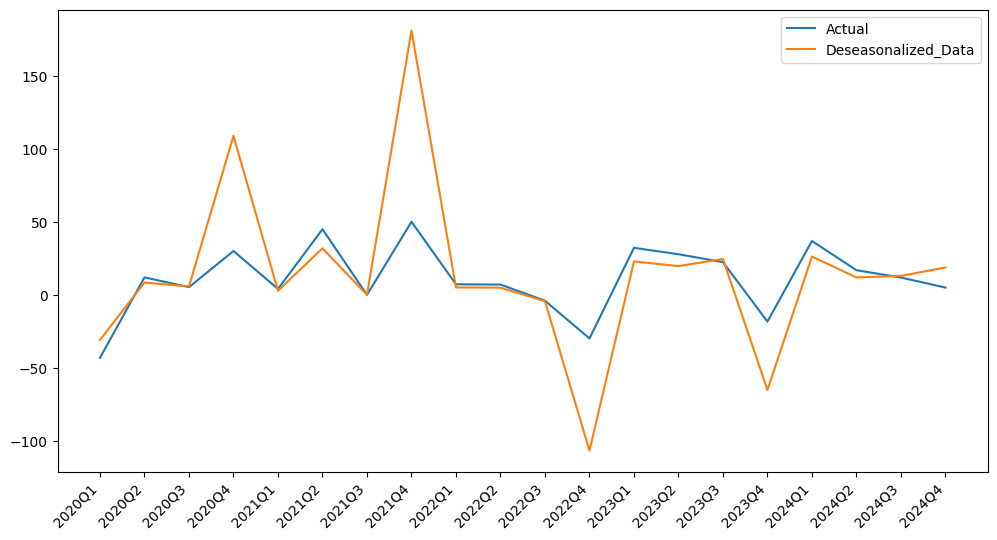

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df_seasonal_returns["Year_Quarter"], df_seasonal_returns['Rate of Return'], label = "Actual")
plt.plot(df_seasonal_returns["Year_Quarter"], df_seasonal_returns['Deseasonalized_Data'], label = "Deseasonalized_Data")
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()